In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

In [2]:
df_CV_bereinigt_talia = pd.read_csv("df_CV_bereinigt_talia.csv")

In [3]:
df_history = pd.read_csv("./history_thalia.csv")

In [4]:
df_h = df_history.groupby(['iid'])['attrtype'].value_counts()

In [5]:
df_h.to_frame()

attrtype
iid       attrtype          
100001735 NO             201
          HY              65
          NC               4
          SB               1
100001769 NO              87
...                      ...
288122186 NC               1
          NO               1
288132829 HY               1
          NC               1
          NO               1

[398292 rows x 1 columns]

In [6]:
df_history_bereinigt = df_h.unstack()

In [7]:
df_zusammen = pd.merge(
    df_CV_bereinigt_talia,
    df_history_bereinigt,
    how="inner",
    on= "iid")
#    left_on=None, right_on=None, left_index=False, right_index=False, sort=True, suffixes=("_x", "_y"), copy=True,
#    indicator=False, validate=None)

In [8]:
df_zusammen_pricetotal_asint = df_zusammen

In [9]:
df_zusammen_pricetotal_asint["pricetotal"] = df_zusammen_pricetotal_asint["pricetotal"].astype("int")

In [10]:
df_zusammen_keine_oeffnungen = df_zusammen_pricetotal_asint[numpy.isnan(df_zusammen["NO"])]

In [11]:
df_zusammen_oeffnungen = df_zusammen_pricetotal_asint[~numpy.isnan(df_zusammen["NO"])]

In [12]:
df_zusammen_oeffnungen.head(19)

,iid,pricetotal,HB,HY,NC,NO,SB,SC
0,100002747,155,1.0,36.0,NaN,5.0,3.0,NaN
2,100009745,599,NaN,37.0,1.0,6.0,5.0,NaN
3,100011954,1013,NaN,56.0,1.0,63.0,1.0,NaN
5,100013945,74,NaN,37.0,NaN,3.0,3.0,NaN
6,100016146,22,NaN,63.0,14.0,19.0,NaN,NaN
7,100017834,15,NaN,55.0,2.0,2.0,6.0,NaN
8,100021341,145,1.0,65.0,3.0,18.0,NaN,NaN
12,100024712,0,NaN,63.0,3.0,7.0,NaN,NaN
13,100024878,92,NaN,33.0,NaN,1.0,1.0,NaN
15,100028456,22,NaN,65.0,10.0,21.0,NaN,NaN


(array([4706., 8218., 7238., 8730., 6840., 7004., 4895., 6358., 3946.,
        3402., 4013., 3003., 2276., 1892., 1790., 1723., 1341., 1320.,
        1171., 1008., 1019.,  868.,  789.,  759.,  648.,  640.,  547.,
         531.,  476.,  443.,  447.,  423.,  394.,  348.,  329.,  309.,
         277.,  273.,  251.,  234.,  242.,  234.,  184.,  217.,  175.,
         163.,  172.,  163.,  158.,  140.,  141.,  135.,  123.,  112.,
         122.,  120.,  105.,  122.,  109.,   93.,   87.,   74.,  115.,
          96.,   91.,   96.,   75.,   87.,   82.,   88.,   76.,   69.,
          71.,   58.,   68.,   59.,   64.,   53.,   49.,   58.,   70.,
          52.,   50.,   53.,   52.,   46.,   46.,   45.,   42.,   34.,
          42.,   36.,   34.,   42.,   32.,   38.,   39.,   39.,   48.]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
        130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250,
        260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380

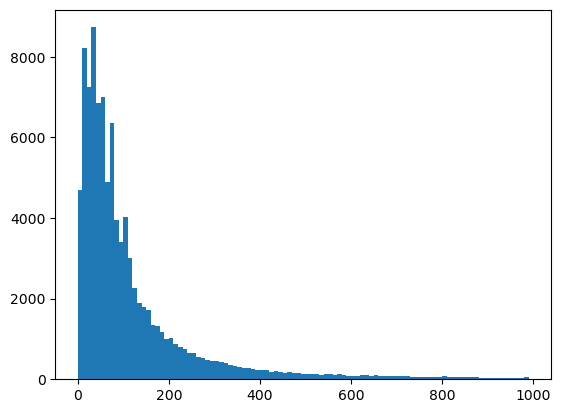

In [13]:
plt.hist(df_zusammen_oeffnungen["pricetotal"], bins=range(0, 1000, 10))

(array([1.844e+03, 3.571e+03, 2.777e+03, 3.635e+03, 2.416e+03, 2.631e+03,
        1.668e+03, 2.225e+03, 1.250e+03, 1.213e+03, 1.346e+03, 9.590e+02,
        7.580e+02, 5.580e+02, 5.680e+02, 4.870e+02, 3.840e+02, 3.920e+02,
        3.060e+02, 2.480e+02, 2.680e+02, 2.230e+02, 2.080e+02, 1.860e+02,
        1.530e+02, 1.770e+02, 1.520e+02, 1.170e+02, 1.160e+02, 1.060e+02,
        9.000e+01, 7.400e+01, 9.500e+01, 1.000e+02, 6.100e+01, 6.800e+01,
        5.300e+01, 6.900e+01, 5.100e+01, 6.500e+01, 5.600e+01, 5.000e+01,
        3.500e+01, 3.600e+01, 4.100e+01, 3.800e+01, 2.400e+01, 2.800e+01,
        3.800e+01, 3.300e+01, 2.800e+01, 2.300e+01, 2.500e+01, 2.200e+01,
        1.900e+01, 1.900e+01, 2.900e+01, 2.800e+01, 2.100e+01, 1.400e+01,
        2.100e+01, 1.800e+01, 2.100e+01, 1.800e+01, 1.500e+01, 1.000e+01,
        2.000e+01, 1.600e+01, 1.000e+01, 1.800e+01, 1.900e+01, 1.600e+01,
        9.000e+00, 8.000e+00, 1.400e+01, 1.400e+01, 5.000e+00, 1.200e+01,
        8.000e+00, 1.200e+01, 1.400e+0

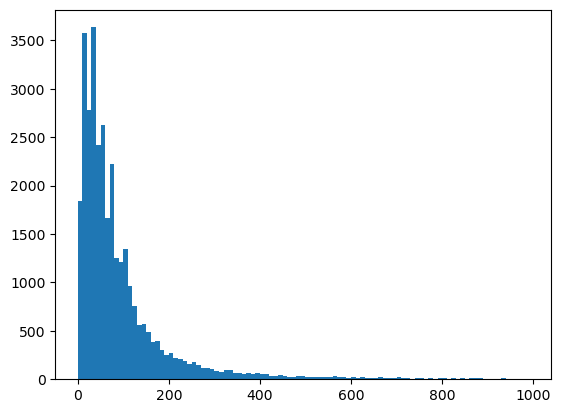

In [14]:
plt.hist(df_zusammen_keine_oeffnungen["pricetotal"], bins=range(0, 1000, 10))

In [15]:
print(df_zusammen_keine_oeffnungen[(df_zusammen_keine_oeffnungen["HY"] >= 20)
                                  & (df_zusammen_keine_oeffnungen["pricetotal"] <= 4000)]["pricetotal"].mean())
print(df_zusammen_oeffnungen[(df_zusammen_oeffnungen["HY"] >= 20)
                            & (df_zusammen_oeffnungen["pricetotal"] <= 4000)]["pricetotal"].mean())

308.94017094017096
413.4328476558628


(array([15., 12., 17., 16., 18., 14., 15., 12., 12.,  5.,  7.,  8.,  7.,
         5.,  2.,  3.,  3.,  6.,  2.,  2.,  3.,  1.,  4.,  1.,  3.,  2.,
         1.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,
         0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,
         1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  2.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
        130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250,
        260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380,
        390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510,
        520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640,
        650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770,
 

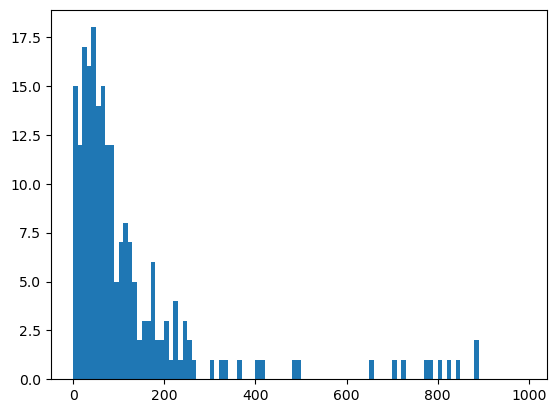

In [16]:
plt.hist(df_zusammen_keine_oeffnungen[df_zusammen_keine_oeffnungen["HY"] >= 20]["pricetotal"], bins=range(0, 1000, 10))

In [17]:
stats.ttest_1samp(a = df_zusammen_oeffnungen[df_zusammen_oeffnungen["HY"] >= 20]["pricetotal"], 
                  popmean = df_zusammen_keine_oeffnungen[df_zusammen_keine_oeffnungen["HY"] >= 20]["pricetotal"].mean())

Ttest_1sampResult(statistic=12.847725616505665, pvalue=1.6982072286908587e-37)

In [27]:
stats.ttest_ind(a = df_zusammen_oeffnungen[df_zusammen_oeffnungen["HY"] >= 20]["pricetotal"], 
                  b = df_zusammen_keine_oeffnungen[df_zusammen_keine_oeffnungen["HY"] >= 20]["pricetotal"], equal_var = "False")

Ttest_indResult(statistic=1.9291883804902252, pvalue=0.053733846267515)

In [25]:
stats.ttest_ind(a = df_zusammen_oeffnungen[df_zusammen_oeffnungen["HY"] >= 20]["pricetotal"], 
                  b = df_zusammen_keine_oeffnungen[df_zusammen_keine_oeffnungen["HY"] >= 20]["pricetotal"])

Ttest_indResult(statistic=1.9291883804902252, pvalue=0.053733846267515)

In [28]:
stats.ttest_ind(a = df_zusammen_oeffnungen[df_zusammen_oeffnungen["HY"] >= 10]["pricetotal"], 
                  b = df_zusammen_keine_oeffnungen[df_zusammen_keine_oeffnungen["HY"] >= 10]["pricetotal"])

Ttest_indResult(statistic=0.8837007122847327, pvalue=0.3768675963043625)

In [29]:
stats.ttest_ind(a = df_zusammen_oeffnungen["pricetotal"], 
                  b = df_zusammen_keine_oeffnungen["pricetotal"])

Ttest_indResult(statistic=4.495452300175542, pvalue=6.94806838889376e-06)

In [30]:
stats.ttest_ind(a = df_zusammen_oeffnungen[df_zusammen_oeffnungen["HY"] >= 30]["pricetotal"], 
                  b = df_zusammen_keine_oeffnungen[df_zusammen_keine_oeffnungen["HY"] >= 30]["pricetotal"])

Ttest_indResult(statistic=3.0532103176835204, pvalue=0.002271466150005986)

In [18]:
df_zusammen_keine_oeffnungen_agg = df_zusammen_keine_oeffnungen.groupby("pricetotal").agg("count")

df_zusammen_keine_oeffnungen_agg = df_zusammen_keine_oeffnungen_agg.reset_index()

In [19]:
df_zusammen_oeffnungen_agg = df_zusammen_oeffnungen.groupby("pricetotal").agg("count")

df_zusammen_oeffnungen_agg = df_zusammen_oeffnungen_agg.reset_index()

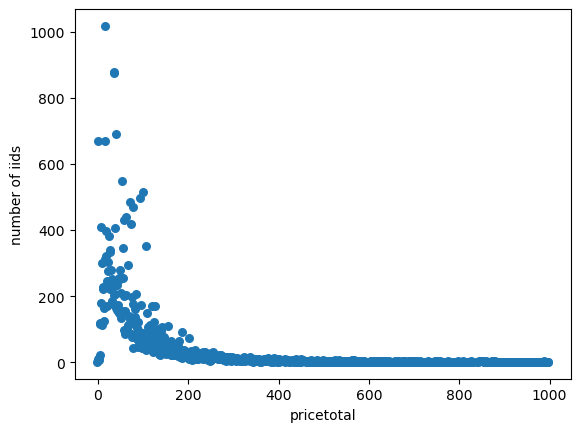

In [20]:
x = df_zusammen_keine_oeffnungen_agg[df_zusammen_keine_oeffnungen_agg["pricetotal"] <=1000]["pricetotal"]
y = df_zusammen_keine_oeffnungen_agg[df_zusammen_keine_oeffnungen_agg["pricetotal"] <=1000]["iid"]
plt.scatter(x, y, s=30)
plt.xlabel('pricetotal')
plt.ylabel('number of iids')
plt.show()

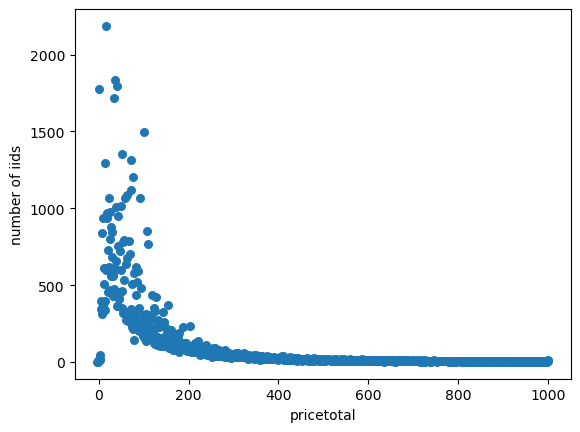

In [21]:
x = df_zusammen_oeffnungen_agg[df_zusammen_oeffnungen_agg["pricetotal"] <=1000]["pricetotal"]
y = df_zusammen_oeffnungen_agg[df_zusammen_oeffnungen_agg["pricetotal"] <=1000]["iid"]
plt.scatter(x, y, s=30)
plt.xlabel('pricetotal')
plt.ylabel('number of iids')
plt.show()